# **Project 4 **


In this assignment, you will be performing experiments involving regression using the Beijing PM2.5 Data Set:

The hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.
PM2. 5 refers to atmospheric particulate matter (PM) that have a diameter of less than 2.5 micrometers, which is about 3% the diameter of a human hair.
Commonly written as PM2.5, particles in this category are so small that they can only be detected with an electron microscope.
The data set can be found in the UCI Repository:  https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data (Links to an external site.)

Your task is to create a well-documented report using a Google Colab Jupyter notebook to:

Perform data scrubbing (handle missing data, normalization, scaling, etc.)
Perform linear as well as non-linear regression on the dataset 
Evaluate the performance of  each model using k-fold cross validation
Plot and compare learning curves for all models 
Fully discuss which model performs the best and why
 

[Source: https://royalsocietypublishing.org/doi/full/10.1098/rspa.2015.0257]



# **Import all the required libraries Here:**

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
import os
datapath = os.path.join("datasets", "PRSA_data_2010.1.1-2014.12.31.csv", "")

In [0]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# **imports the CSV dataset using pandas**

In [41]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pandyasagar323/Advance-Machine-Learning-/master/Project%204/PRSA_data_2010.1.1-2014.12.31.csv'
PRSA_data_2010 = pd.read_csv(url)
PRSA_data_2010.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,0,-21,-11.0,1021.0,0,1.79,0,0
1,2,2010,1,1,1,0,-21,-12.0,1020.0,0,4.92,0,0
2,3,2010,1,1,2,0,-21,-11.0,1019.0,0,6.71,0,0
3,4,2010,1,1,3,0,-21,-14.0,1019.0,0,9.84,0,0
4,5,2010,1,1,4,0,-20,-12.0,1018.0,0,12.97,0,0


# **Let’s explore the data a little bit by checking the number of rows and columns in our datasets.**

In [91]:
PRSA_data_2010.shape

(43824, 13)

In [42]:
PRSA_data_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    43824 non-null int64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null int64
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(3), int64(10)
memory usage: 4.3 MB


# **To see the statistical details of the dataset, we can use describe()**

In [43]:
PRSA_data_2010.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.0,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,93.962030,1.817246,12.448521,1016.447654,0.0,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.253236,14.433440,12.198613,10.268698,0.0,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.0,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,24.000000,-10.000000,2.000000,1008.000000,0.0,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,68.000000,2.000000,14.000000,1016.000000,0.0,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,0.0,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,0.0,585.600000,27.000000,36.000000


# **And finally, let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data using the below script**

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


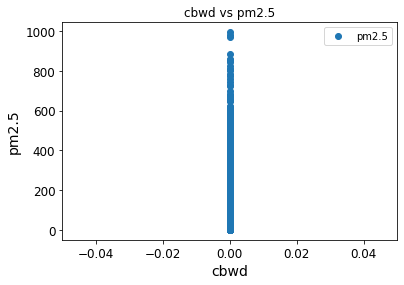

In [51]:
PRSA_data_2010.plot(x='cbwd', y='pm2.5', style='o')  
plt.title('cbwd vs pm2.5')  
plt.xlabel('cbwd')  
plt.ylabel('pm2.5')  
plt.show()

# **Let’s check the average max temperature and once we plot it we can observe that the Average Maximum Temperature is Between Nearly 25 and 35.**

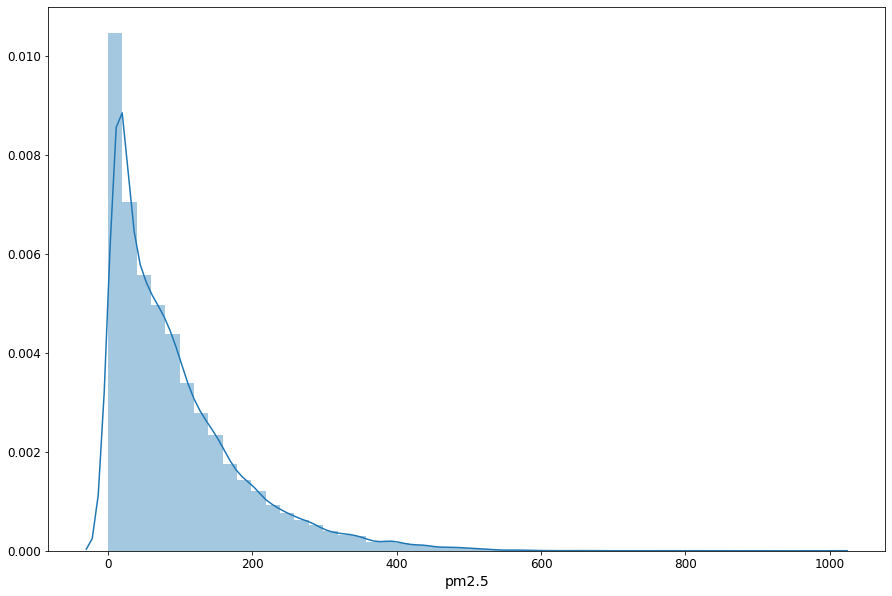

In [65]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(PRSA_data_2010['pm2.5'])

# Our next step is to divide the data into “attributes” and “labels”.Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the cbwd depending upon the pm2.5 recorded. Therefore our attribute set will consist of the “pm2.5” column which is stored in the X variable, and the label will be the “cbwd” column which is stored in y variable.

In [0]:
X = PRSA_data_2010['cbwd'].values.reshape(-1,1)
y = PRSA_data_2010['pm2.5'].values.reshape(-1,1)

# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
# The test_size variable is where we actually specify the proportion of the test set.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [56]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.**

In [57]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[94.13990701]
[[0.]]


In [0]:
y_pred = regressor.predict(X_test)

In [59]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,168,94.139907
1,82,94.139907
2,307,94.139907
3,6,94.139907
4,197,94.139907
...,...,...
8760,92,94.139907
8761,78,94.139907
8762,472,94.139907
8763,0,94.139907


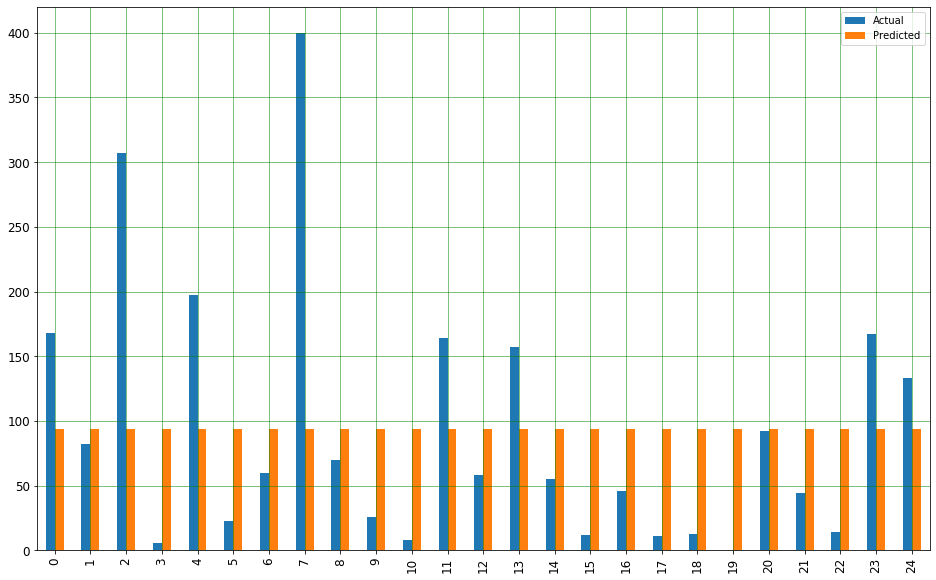

In [66]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

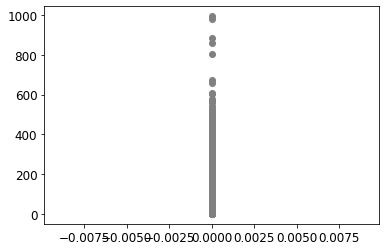

In [61]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 69.52168856518244
Mean Squared Error: 8755.075261177155
Root Mean Squared Error: 93.56855914877153


# **Multiple Linear Regression**

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
 PRSA_data_2010= pd.read_csv('https://raw.githubusercontent.com/pandyasagar323/Advance-Machine-Learning-/master/Project%204/PRSA_data_2010.1.1-2014.12.31.csv')

In [69]:
PRSA_data_2010.shape

(43824, 13)

In [70]:
PRSA_data_2010.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.0,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,93.962030,1.817246,12.448521,1016.447654,0.0,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.253236,14.433440,12.198613,10.268698,0.0,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.0,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,24.000000,-10.000000,2.000000,1008.000000,0.0,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,68.000000,2.000000,14.000000,1016.000000,0.0,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,0.0,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,0.0,585.600000,27.000000,36.000000


In [71]:
PRSA_data_2010.isnull().any()

No       False
year     False
month    False
day      False
hour     False
pm2.5    False
DEWP     False
TEMP     False
PRES     False
cbwd     False
Iws      False
Is       False
Ir       False
dtype: bool

In [0]:
PRSA_data_2010 = PRSA_data_2010.fillna(method='ffill')

In [0]:
X = PRSA_data_2010[['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd','Iws','Is','Ir']].values
y = PRSA_data_2010['cbwd'].values

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


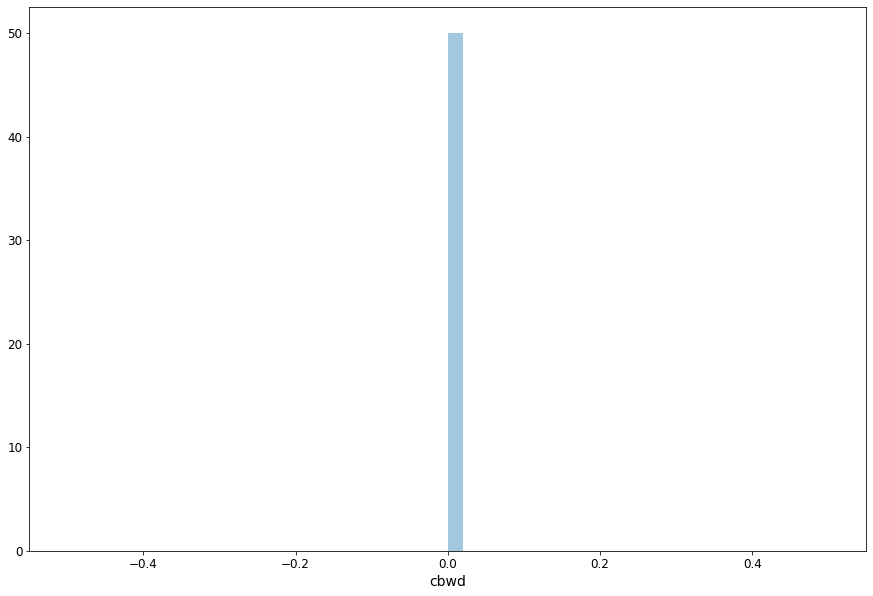

In [78]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(PRSA_data_2010['cbwd'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

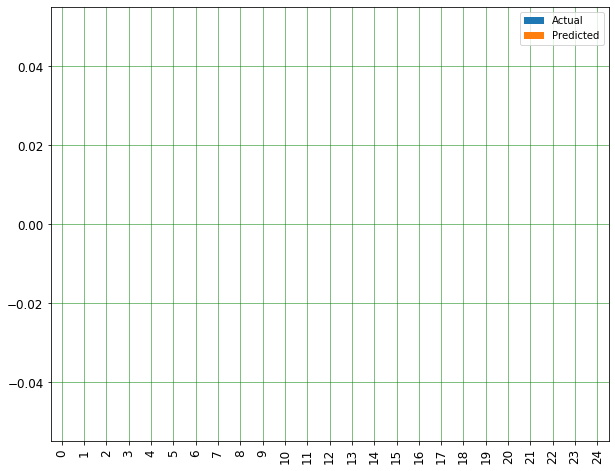

In [89]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
